In [57]:
import networkx as nx#复杂网络分析库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
xls = pd.ExcelFile(r'D:\Documents\WeChat Files\a-937579140\FileStorage\File\2019-07\知网数据.xls')#读取xls表格

In [59]:
readf = pd.read_excel(xls,'Sheet1')#读取第一个表

In [78]:
frame = readf[readf['共引文献'].notnull()]#如果关键词那一列非空，读取所有数据

In [79]:
keywords = []#关键词列表，里面记录了所有的关键词，没有重复
for keyword in frame['共引文献']:#分隔关键词，并加入到列表中，去重
    if ',' in keyword:
        temp = keyword.split(',')
        for x in temp:
            if x not in keywords:
                keywords.append(x)
    elif ';' in keyword:
        temp = keyword.split(';')
        for x in temp:
            if x not in keywords:
                keywords.append(x)
    else:
        if keyword not in keywords:
            keywords.append(keyword)

In [80]:
df = pd.DataFrame(index=frame['序号'],columns=keywords)    #建立以标题为行，关键词为列的DataFrame矩阵
df.index.name='序号'
df.columns.name='共引文献'

In [81]:
for row in frame['序号']:#将这一篇文献所拥有的关键词在矩阵中标记为1
    # print(row)
    for keyword in df.columns:
        if keyword in frame.loc[row]['共引文献']:
            #print(keyword)
            df.loc[row][keyword] = 1

In [82]:
df = df.fillna(0)#填充空值

In [83]:
data = df.values.T.dot(df.values)#建立关键词之间的相关性，边的长度为相关性，在这里是将两个df点乘，df.values是按行读取值
#print(df.values)#这个时候data其实是关联度

In [101]:
df2 = pd.DataFrame(data = data,index=keywords,columns=keywords)#建立关键词之间的相关性矩阵

value = lambda x : x * 30 if x > 0 else 0
df2 = df2.applymap(value)
# for i in range(0, len(df2.index)):
#     for j in range(0, len(df2.columns)):
#         if df2.iloc[i][j] < 4:#这里设置阈值
#             df2.iloc[i][j] = 0
print(df2)

                               基于区块链技术视角下未来财务会计发展方向研究  \
基于区块链技术视角下未来财务会计发展方向研究                             30   
 基于区块链理念探索“一带一路”区域的新零售模式                           30   
 收集个人信息的电子合同中格式条款与强制缔约的问题研究                        30   
 区块链智联世界:去中心化的信用中介2.0                              30   
 我国互联网金融监管理论研究及现状分析                                30   
 区块链技术下价值互联网对传统金融机构的影响                             30   
 基于区块链技术的混凝土泵车泵送方量数据存储研究                           30   
 论互联网金融消费者权益保护的有效路径                                30   
 浅谈区块链金融的机遇与挑战                                     30   
 区块链对互联网金融行业的变革展望                                  30   
 互联网金融风险管理研究                                       30   
 比特币法律监管问题研究                                       30   
 我国互联网金融风险分析及监管对策研究                                30   
 我国金融区块链应用的法律问题研究                                  30   
 互联网票据理财法律风险防范研究                                   30   
 美国网络银行的发展及其对中国的启示                                 30   
 中美比特币监管比较研究                   

In [102]:
net = nx.Graph(df2)#创建无向图，以关键词为节点，相关性为边

In [103]:
de=dict(net.degree())#建立字典，关键字为索引，度（关联情况）为值
pos = nx.spring_layout(net)#四种建图模式，spectral,shell,circular,spring，spring是可以看的了
keywords = [i for i in keywords]#有边的关键词

In [104]:
array = np.zeros(len(keywords))#建立以度为值的一维矩阵
j = 0#记录值的数量
for i in de.keys():
    array[j] = de[i]
    j+=1
arg = np.argsort(-np.array(array))
labels = {}#记录关键词
for index in range(0, len(keywords)):
    labels[keywords[arg[index]]] = keywords[arg[index]]

In [105]:
de2 = [de[v]*10 for v in sorted(de.keys(), reverse=False)]#应该是节点的大小，尺寸调整合适

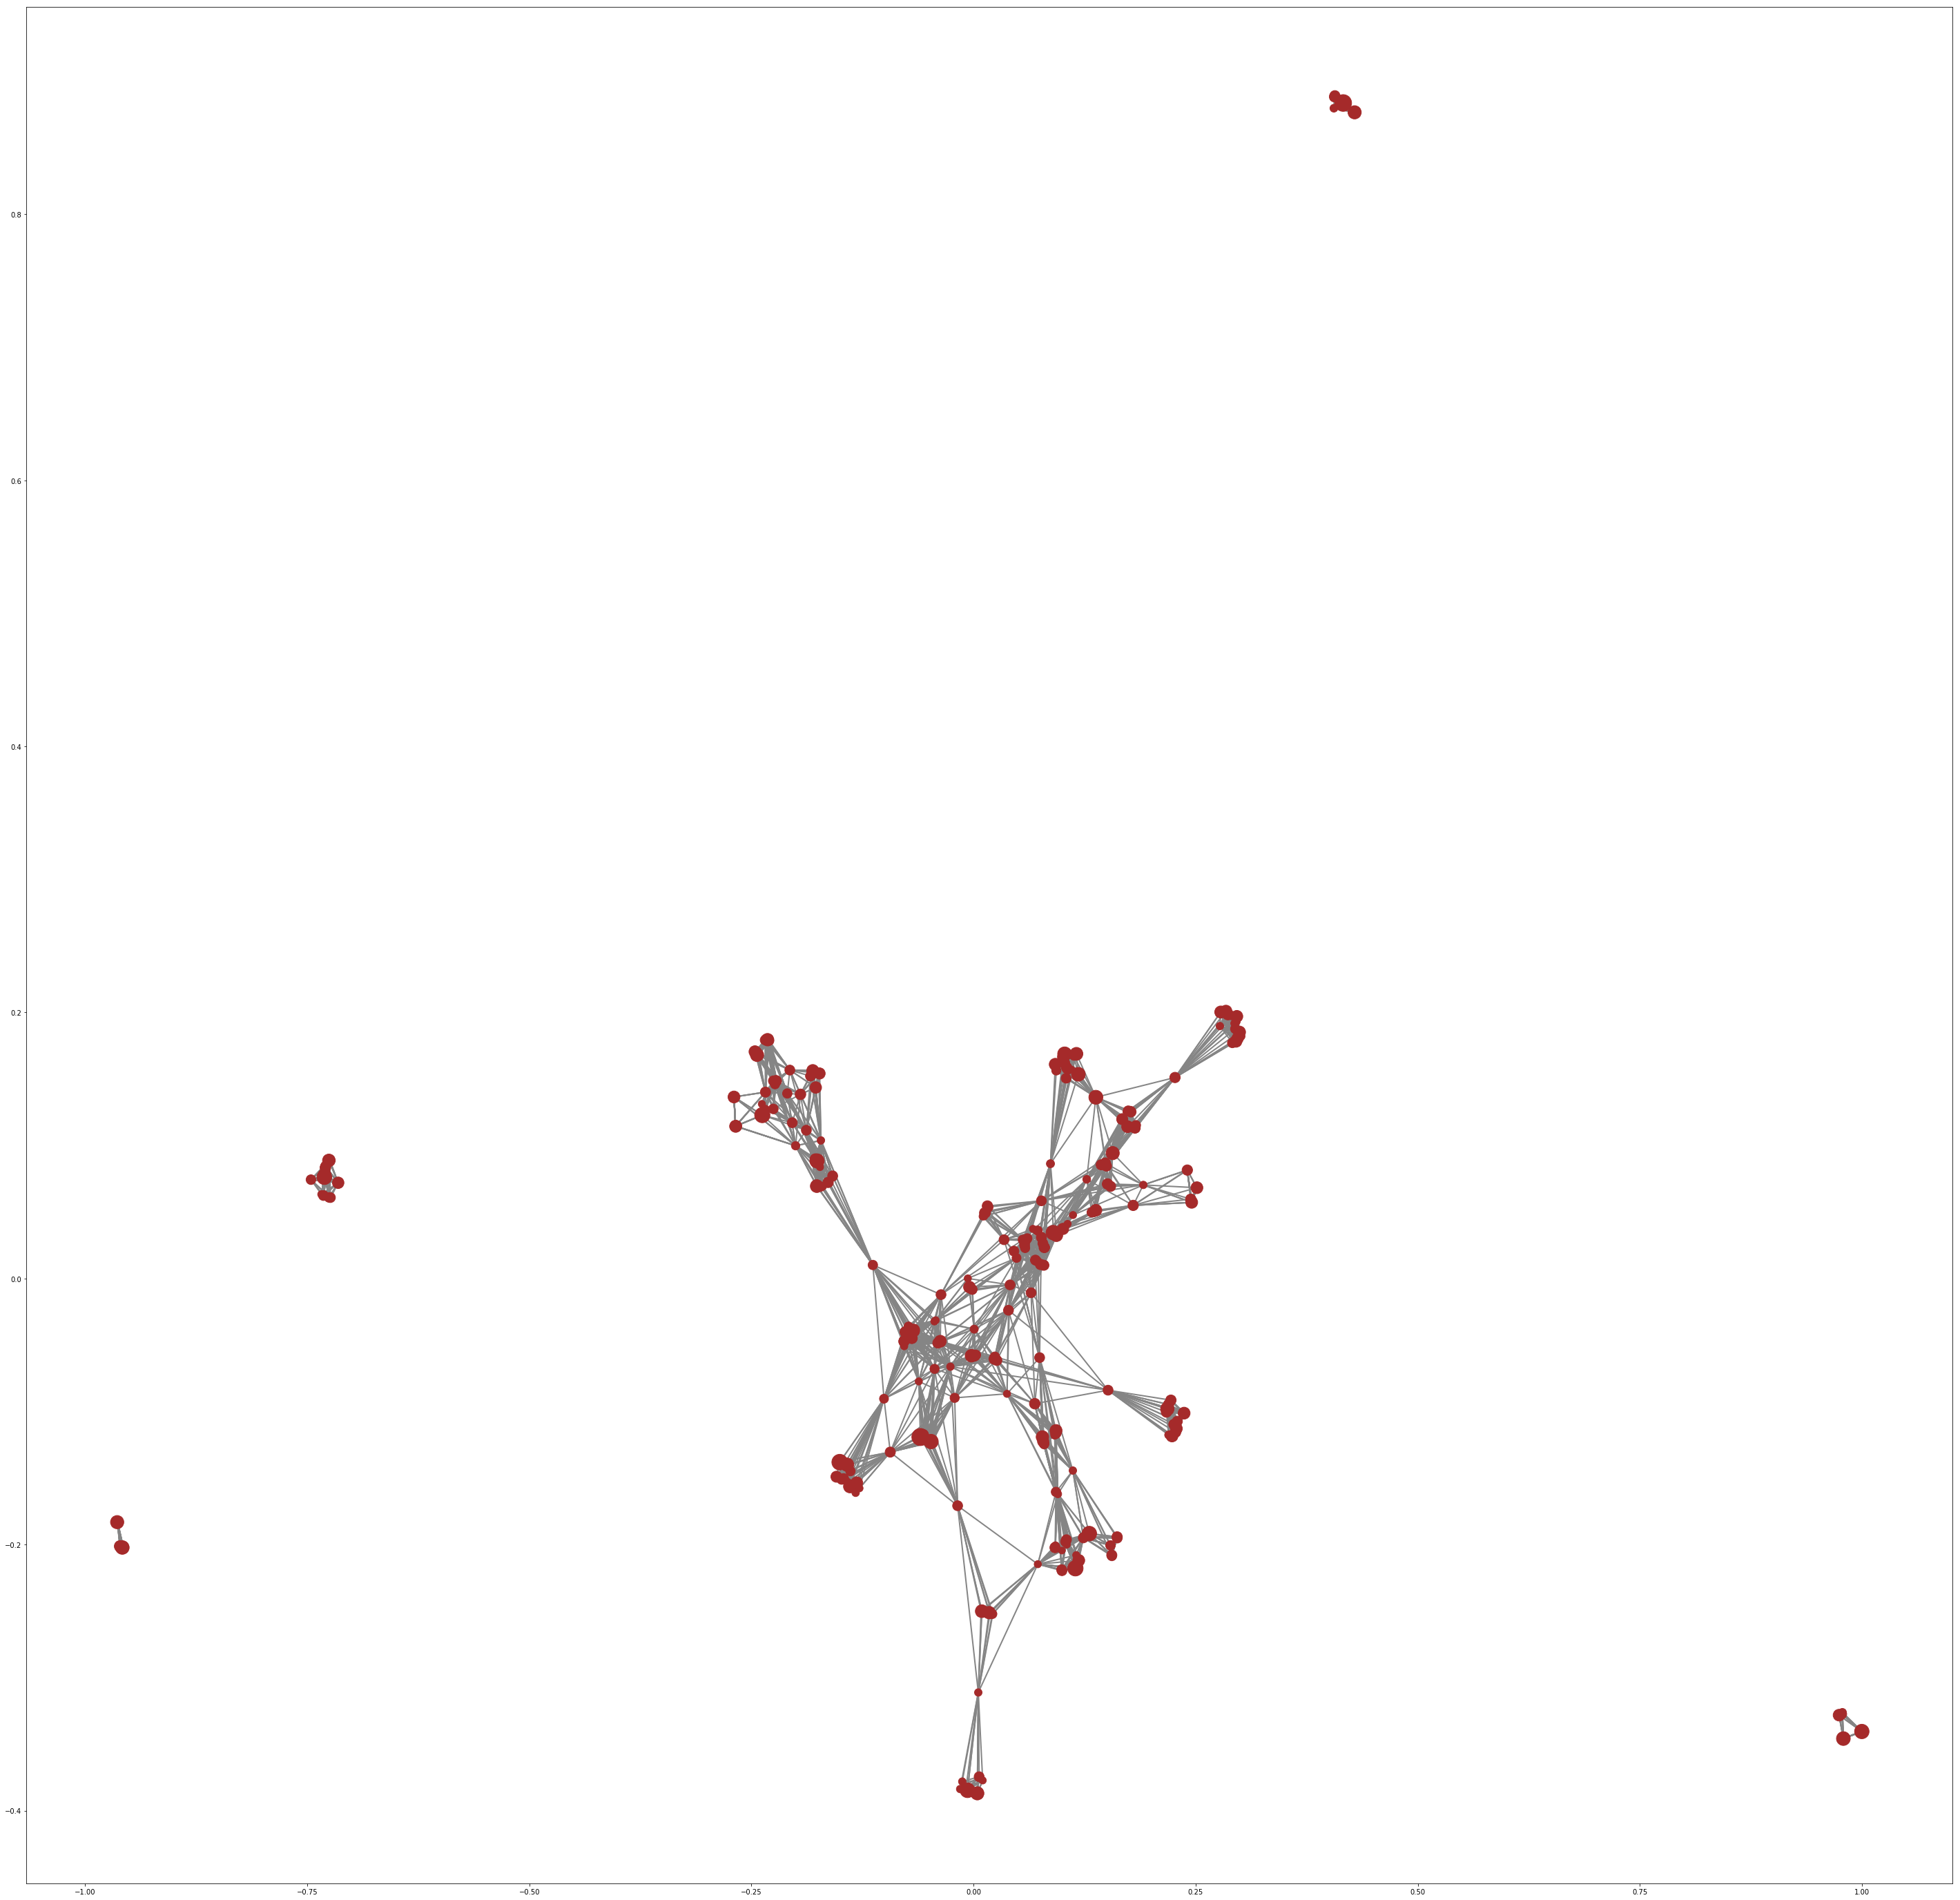

In [106]:
plt.figure(figsize=(50, 50))
#nx.draw_networkx_labels(net,pos,labels, font_size=40,font_color='black',font_family ='YouYuan')
nx.draw_networkx(net, pos, node_size=de2, with_labels = False, node_color='#A52A2A', linewidths=None, width=2.0, edge_color ='#858585')